# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [2]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
# Load the data (use delim_whitespace=True)
df = pd.read_csv("../../assets/datasets/salary.dat",delim_whitespace=True)

# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [4]:
df.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

In [5]:
#Apply value_counts() to series for "sx", "dg", and "rk"

pd.value_counts(df["sx"])
pd.value_counts(df["dg"])
pd.value_counts(df["rk"])
print(pd.value_counts(df["sx"]),pd.value_counts(df["dg"]),pd.value_counts(df["rk"]))

(male      38
female    14
Name: sx, dtype: int64, doctorate    34
masters      18
Name: dg, dtype: int64, full         20
assistant    18
associate    14
Name: rk, dtype: int64)


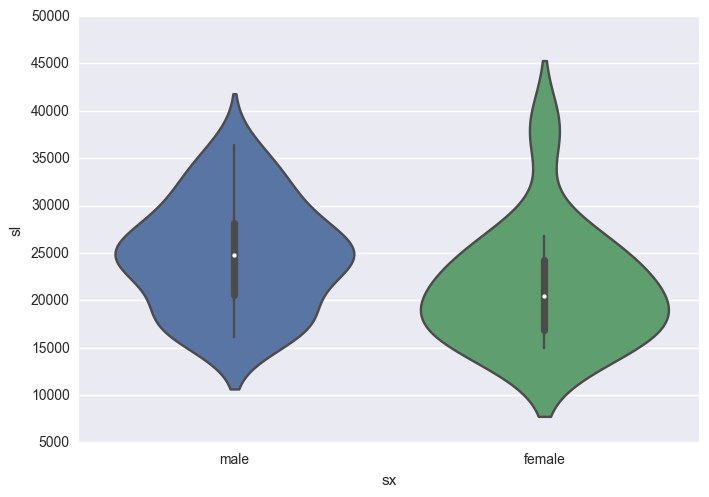

In [6]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"

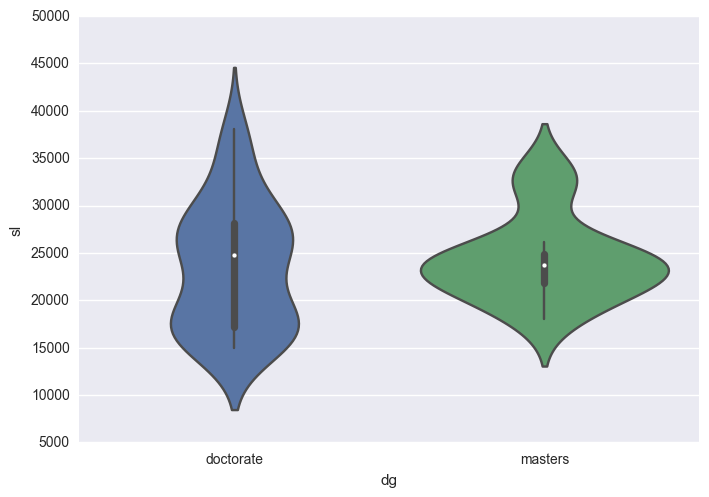

In [7]:
sns.violinplot(x="dg", y="sl", data=df)
plt.show()



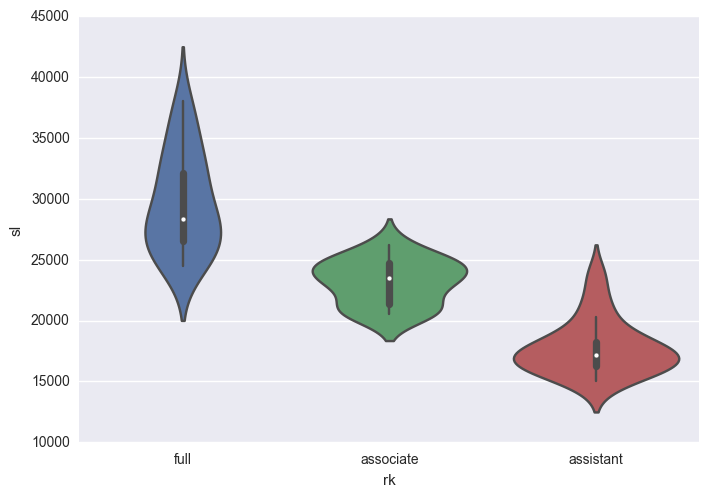

In [8]:
sns.violinplot(x="rk", y="sl", data=df)
plt.show()



In [9]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
   # print(dummies)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [10]:
df.dtypes

sx               object
rk               object
yr                int64
dg               object
yd                int64
sl                int64
sx_female       float64
sx_male         float64
rk_assistant    float64
rk_associate    float64
rk_full         float64
dg_doctorate    float64
dg_masters      float64
dtype: object

In [11]:
### Here's an example to get you started.

#Try reruning the next cell multiple times. You should see an improvement for some samples.

In [12]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
print(X)
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)#return r2

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
lm = linear_model.LinearRegression()
# cross validation of model
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)
print

# Did the results improve?

    yr  yd
26  11  14
51   0   2
24   9  12
44   2   3
48   1   1
Sample: 0.953471218551
All data with sample model: -13.4531533309
Sample with regularization: 0.953471218551
All data with regularization model: -13.4531533309



In [13]:
# Fit a model to the men
mask = df["sx"] == "male"
X1 = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y1 = df[mask][u'sl']
#print(X)
lm = linear_model.RidgeCV(alphas=[0.1, 1, 10])
model = lm.fit(X1, y1)
predictions = model.predict(X1)
print " for male:", model.score(X1, y1)
#using this model for different part of data set
mask = df["sx"] == "female"
X2= df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y2 = df[mask][u'sl']
print " for female:", model.score(X2, y2)


## Fit a linear model here
## Plot the data
## and print the model score

# Apply the same model to the women and compare the model score


 for male: 0.886199410543
 for female: 0.697333350848


ValueError: x and y must be the same size

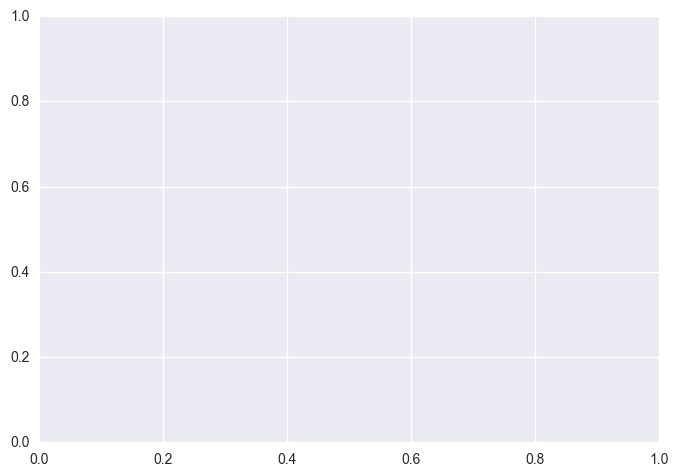

In [14]:
plt.scatter(X1, y1)
## The line / model
plt.plot(y2, predictions)


In [ ]:
# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
#print(X)
lm = linear_model.RidgeCV(alphas=[0.1, 1, 10])
model = lm.fit(X, y)
predictions = model.predict(X)
print " for female:", model.score(X, y)
#using this model for different part of data set
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print " for male:", model.score(X, y)
print("alpha",model.alpha_)
print(model.coef_)



# Apply to men
print("with reg")

In [15]:
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
#print(X)
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print " for male:", model.score(X, y)
#using this model for different part of data set
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print " for female:", model.score(X, y)
#
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
#print(X)

model = lm.fit(X, y)
predictions = model.predict(X)
print " for female:", model.score(X, y)
#using this model for different part of data set
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print " for male:", model.score(X, y)

print(predictions)

 for male: 0.88630543814
 for female: 0.69448811957
 for female: 0.781837240731
 for male: 0.657523429275
[ 29942.85781373  25161.6502844   30779.07383718  29336.41806469
  21338.3497156   20796.48940583  22343.51059417  20035.83790741
  17485.09895158  16648.88292813  16899.70464527  16314.31033897
  16314.31033897  15603.50517408]


In [ ]:
for reducing the problem of overfiting or underfiting of model we use reg. 

In [ ]:
# This time use regularlization (RidgeCV)

# Apply to women first


# Apply to men



### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

In [ ]:
mask = (df["dg"] == "doctorate")


In [ ]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=


In [ ]:
# With regularization

mask = (df["dg"] != "doctorate") # !=


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

In [ ]:
mask = (df["rk"] == "full") # First subset, there are two more


In [ ]:
# The second permutation of three

In [ ]:
# The third permutation of three

# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [ ]:
# Without regularization
mask = df["sx"] == "female"


In [ ]:
# With regularization, RidgeCV

In [ ]:
# With regularization, LassoCV